In [65]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from datetime import timedelta

# Pandas Datetime [25 exercises with solution]

## Чтение и очистка данных

In [2]:
df = pd.read_csv('data/ufo_sighting_data.csv', 
                 parse_dates=[0, 8], 
                 dtype={'length_of_encounter_seconds': 'str',
                        'latitude': 'str'})
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head(5)

,date_time,city,state/province,country,ufo_shape,length_of_encounter_seconds,described_duration_of_encounter,description,date_documented,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,2004-04-27,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.4180556,-157.803611


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   date_time                        80332 non-null  object        
 1   city                             80332 non-null  object        
 2   state/province                   74535 non-null  object        
 3   country                          70662 non-null  object        
 4   ufo_shape                        78400 non-null  object        
 5   length_of_encounter_seconds      80332 non-null  object        
 6   described_duration_of_encounter  80332 non-null  object        
 7   description                      80317 non-null  object        
 8   date_documented                  80332 non-null  datetime64[ns]
 9   latitude                         80332 non-null  object        
 10  longitude                        80332 non-null  float64  

Наблюдаем проблемы: 
1. Варнинг по колонкам 5, 9. Нужно корректно разобраться в ситуации.
2. Поле date_time не преобразовалось в тип даты. Нужно исследовать в чем проблема.

**Кейс2**
Попробуем явно преобразовать поле date_time. Получаем ошибку, из которой следует, что есть записи, у которых часы указаны некорректно: 24:00. Способ решения: выбрать записи с некорректным значением поля и преобразовать у них время на 0 часов следующего дня.

In [4]:
df.date_time.apply(lambda x: pd.to_datetime(x))

ParserError: hour must be in 0..23: 10/11/2006 24:00

Находим 694 строки с некорректным временем.

In [5]:
df.query('date_time.str.contains("24:00")')

,date_time,city,state/province,country,ufo_shape,length_of_encounter_seconds,described_duration_of_encounter,description,date_documented,latitude,longitude
388,10/11/2006 24:00,rome,ny,us,oval,120,a min or two,I was walking from the garage to the house&#44...,2007-02-01,43.2127778,-75.456111
693,10/1/2001 24:00,chulucanas-piura la vieja (peru),NaN,NaN,other,6312000,2 years,go to: http://www.24horas.com.pe/data/videos/...,2003-03-04,-5.129547,-80.120569
962,10/1/2012 24:00,novi,mi,us,triangle,300,5 minutes,V shaped and 8 big and very brite lights&#44mo...,2012-10-30,42.4805556,-83.475556
1067,10/12/2003 24:00,salatiga (indonesia),NaN,NaN,disk,22,22 seconds,UFO in Salatiga&#44Indonesia,2003-10-31,-7.33683,110.498817
1221,10/12/2013 24:00,cincinnati,oh,us,fireball,300,3-5 minutes,A bright orange light split into four&#44 did ...,2013-10-14,39.1619444,-84.456944
...,...,...,...,...,...,...,...,...,...,...,...
79136,9/4/2005 24:00,boonville,nc,us,cigar,10800,3+ hours,Unusual activity in our small community&#44 cr...,2013-09-09,36.2325,-80.708333
79137,9/4/2005 24:00,redondo beach,ca,us,triangle,300,5 minutes,Triangulat UFO seen over Redondo Beach&#44 Cal...,2005-12-16,33.8491667,-118.387500
79740,9/7/2002 24:00,portsmouth,oh,us,changing,900,15 minutes,A bright red light hoovering in the sky.,2002-09-13,38.7316667,-82.997778
79759,9/7/2004 24:00,montrose,co,us,unknown,1200,20 minutes,Stationary object with three pulsating lights ...,2004-09-09,38.4783333,-107.875556


Дополнительно проверим в каком формате указана дата в этом поле:
1. Разобьем колонки на дату и время по пробелу.
2. Разобьем дату по слешу на составные части.
3. Проверим какие значения содержатся в обеих частях.
4. В поле date1 - 12 уникальных значений - хранится месяц, в поле date2 - 31 уникальное значение - это день месяца. 5. Получаем неудобный для восприятия формат: m/d/Y.

In [6]:
df[['date', 'time']] = df.date_time.str.split(' ', expand=True)
df[['date1', 'date2', 'year']] = df.date.str.split('/', expand=True)
df[['date1', 'date2']].describe()

,date1,date2
count,80332,80332
unique,12,31
top,7,15
freq,9520,5968


Преобразуем поле data в в более удобный формат: Y-m-d и тип datetime.

In [7]:
df['date'] = df.date.apply(lambda x: dt.strptime(x, '%m/%d/%Y'))
df.date

0       1949-10-10
1       1949-10-10
2       1955-10-10
3       1956-10-10
4       1960-10-10
           ...    
80327   2013-09-09
80328   2013-09-09
80329   2013-09-09
80330   2013-09-09
80331   2013-09-09
Name: date, Length: 80332, dtype: datetime64[ns]

In [8]:
df.date.info()

<class 'pandas.core.series.Series'>
RangeIndex: 80332 entries, 0 to 80331
Series name: date
Non-Null Count  Dtype         
--------------  -----         
80332 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 627.7 KB


Выполним необходимое преобразование для строк с некорректным временем (24:00): к дате добавим один день, а время заменим на 0:00.

In [9]:
idx = df.query('date_time.str.contains("24:00")').index.to_list()
df.iloc[idx] = df.loc[idx].assign(
                            date=lambda x: x.date + timedelta(days=1),
                            time='00:00')
df.query('date_time.str.contains("24:00")')[['date_time', 'date', 'time']]

,date_time,date,time
388,10/11/2006 24:00,2006-10-12,00:00
693,10/1/2001 24:00,2001-10-02,00:00
962,10/1/2012 24:00,2012-10-02,00:00
1067,10/12/2003 24:00,2003-10-13,00:00
1221,10/12/2013 24:00,2013-10-13,00:00
...,...,...,...
79136,9/4/2005 24:00,2005-09-05,00:00
79137,9/4/2005 24:00,2005-09-05,00:00
79740,9/7/2002 24:00,2002-09-08,00:00
79759,9/7/2004 24:00,2004-09-08,00:00


Добавим новую колонку datetime, объединяющую дату и время записи и сделаем ее индексом.

In [10]:
df = df.assign(datetime = lambda x: x.date + pd.to_timedelta(x.time + ':00'))
df.set_index('datetime', inplace=True)
df

,date_time,city,state/province,country,ufo_shape,length_of_encounter_seconds,described_duration_of_encounter,description,date_documented,latitude,longitude,date,time,date1,date2,year
datetime,,,,,,,,,,,,,,,,
1949-10-10 20:30:00,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,2004-04-27,29.8830556,-97.941111,1949-10-10,20:30,10,10,1949
1949-10-10 21:00:00,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.38421,-98.581082,1949-10-10,21:00,10,10,1949
1955-10-10 17:00:00,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.2,-2.916667,1955-10-10,17:00,10,10,1955
1956-10-10 21:00:00,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.9783333,-96.645833,1956-10-10,21:00,10,10,1956
1960-10-10 20:00:00,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.4180556,-157.803611,1960-10-10,20:00,10,10,1960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-09-09 21:15:00,9/9/2013 21:15,nashville,tn,us,light,600,10 minutes,Round from the distance/slowly changing colors...,2013-09-30,36.1658333,-86.784444,2013-09-09,21:15,9,9,2013
2013-09-09 22:00:00,9/9/2013 22:00,boise,id,us,circle,1200,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,2013-09-30,43.6136111,-116.202500,2013-09-09,22:00,9,9,2013
2013-09-09 22:00:00,9/9/2013 22:00,napa,ca,us,other,1200,hour,Napa UFO&#44,2013-09-30,38.2972222,-122.284444,2013-09-09,22:00,9,9,2013


Удалим вспомогательные колонки.

In [11]:
df.drop(['date', 'time', 'date1', 'date2', 'year'], axis=1, inplace=True)
df

,date_time,city,state/province,country,ufo_shape,length_of_encounter_seconds,described_duration_of_encounter,description,date_documented,latitude,longitude
datetime,,,,,,,,,,,
1949-10-10 20:30:00,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,2004-04-27,29.8830556,-97.941111
1949-10-10 21:00:00,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.38421,-98.581082
1955-10-10 17:00:00,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.2,-2.916667
1956-10-10 21:00:00,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.9783333,-96.645833
1960-10-10 20:00:00,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.4180556,-157.803611
...,...,...,...,...,...,...,...,...,...,...,...
2013-09-09 21:15:00,9/9/2013 21:15,nashville,tn,us,light,600,10 minutes,Round from the distance/slowly changing colors...,2013-09-30,36.1658333,-86.784444
2013-09-09 22:00:00,9/9/2013 22:00,boise,id,us,circle,1200,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,2013-09-30,43.6136111,-116.202500
2013-09-09 22:00:00,9/9/2013 22:00,napa,ca,us,other,1200,hour,Napa UFO&#44,2013-09-30,38.2972222,-122.284444


**Fixed**: индекс имеет тип DatetimeIndex, в нем указаны дата и время корректно.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 80332 entries, 1949-10-10 20:30:00 to 2013-09-09 23:00:00
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   date_time                        80332 non-null  object        
 1   city                             80332 non-null  object        
 2   state/province                   74535 non-null  object        
 3   country                          70662 non-null  object        
 4   ufo_shape                        78400 non-null  object        
 5   length_of_encounter_seconds      80332 non-null  object        
 6   described_duration_of_encounter  80332 non-null  object        
 7   description                      80317 non-null  object        
 8   date_documented                  80332 non-null  datetime64[ns]
 9   latitude                         80332 non-null  object        
 10  longitude              

Разберемся с **кейсом 1**: в колонках 5 и 9 данные mixed типов, вероятно в числовых значениях есть мусор.

In [13]:
pd.to_numeric(df.latitude)

ValueError: Unable to parse string "33q.200088" at position 43782

In [14]:
pd.to_numeric(df.length_of_encounter_seconds)

ValueError: Unable to parse string "2`" at position 27822

Находим, что в колонке length_of_encounter_seconds наблюдения в трех строках есть лишний символ, удаляем его и проверяем.

In [15]:
df[df.length_of_encounter_seconds.str.contains(r'[^\d*|\.*|-]')]
# df.query('length_of_encounter_seconds.str.contains("`")')

,date_time,city,state/province,country,ufo_shape,length_of_encounter_seconds,described_duration_of_encounter,description,date_documented,latitude,longitude
datetime,,,,,,,,,,,
2000-02-02 19:33:00,2/2/2000 19:33,bouse,az,us,NaN,2`,each a few seconds,Driving through Plomosa Pass towards Bouse Loo...,2000-02-16,33.9325,-114.005000
2005-04-10 22:52:00,4/10/2005 22:52,santa cruz,ca,us,NaN,8`,eight seconds,2 red lights moving together and apart with a ...,2005-04-16,36.9741667,-122.029722
2006-07-21 13:00:00,7/21/2006 13:00,ibague (colombia),NaN,NaN,circle,0.5`,1/2 segundo,Viajaba a 27.000 pies en un avion comercial ve...,2006-10-30,4.440663,-75.244141


In [16]:
df.length_of_encounter_seconds.replace('`', '', regex=True, inplace=True)
df.query('length_of_encounter_seconds.str.contains("`")')

,date_time,city,state/province,country,ufo_shape,length_of_encounter_seconds,described_duration_of_encounter,description,date_documented,latitude,longitude
datetime,,,,,,,,,,,


**Fixed** Конвертируем поле length_of_encounter_seconds в числовое и проверяем.

In [17]:
df.length_of_encounter_seconds = df.length_of_encounter_seconds.apply(lambda x: pd.to_numeric(x))
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 80332 entries, 1949-10-10 20:30:00 to 2013-09-09 23:00:00
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   date_time                        80332 non-null  object        
 1   city                             80332 non-null  object        
 2   state/province                   74535 non-null  object        
 3   country                          70662 non-null  object        
 4   ufo_shape                        78400 non-null  object        
 5   length_of_encounter_seconds      80332 non-null  float64       
 6   described_duration_of_encounter  80332 non-null  object        
 7   description                      80317 non-null  object        
 8   date_documented                  80332 non-null  datetime64[ns]
 9   latitude                         80332 non-null  object        
 10  longitude              

Теперь разберемся с мусором в колонке широты (latitude). Найдем строки, содержащие, не числовые значения.

In [18]:
df[df.latitude.str.contains(r'[^\d*|\.*|-]')]

,date_time,city,state/province,country,ufo_shape,length_of_encounter_seconds,described_duration_of_encounter,description,date_documented,latitude,longitude
datetime,,,,,,,,,,,
1974-05-22 05:30:00,5/22/1974 05:30,mescalero indian reservation,nm,NaN,rectangle,180.0,two hours,Huge rectangular object emmitting intense whit...,2012-04-18,33q.200088,-105.624152


In [19]:
df.latitude.replace('q', '', regex=True, inplace=True)
df.latitude = df.latitude.apply(lambda x: pd.to_numeric(x))
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 80332 entries, 1949-10-10 20:30:00 to 2013-09-09 23:00:00
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   date_time                        80332 non-null  object        
 1   city                             80332 non-null  object        
 2   state/province                   74535 non-null  object        
 3   country                          70662 non-null  object        
 4   ufo_shape                        78400 non-null  object        
 5   length_of_encounter_seconds      80332 non-null  float64       
 6   described_duration_of_encounter  80332 non-null  object        
 7   description                      80317 non-null  object        
 8   date_documented                  80332 non-null  datetime64[ns]
 9   latitude                         80332 non-null  float64       
 10  longitude              

In [20]:
df.sample(15)

,date_time,city,state/province,country,ufo_shape,length_of_encounter_seconds,described_duration_of_encounter,description,date_documented,latitude,longitude
datetime,,,,,,,,,,,
2010-09-25 11:15:00,9/25/2010 11:15,raleigh,nc,us,cylinder,3.0,2-3 seconds,Cylindrical Object Over Raleigh NC,2010-11-21,35.771944,-78.638889
1999-10-03 21:45:00,10/3/1999 21:45,salem,or,us,flash,2.0,2 seconds,saw something out of the corner of my eye ture...,1999-10-19,44.943056,-123.033889
2006-04-14 00:45:00,4/14/2006 00:45,london (uk/england),NaN,gb,sphere,5.0,0:05,Bright wight orb hovering and performing high ...,2006-05-15,51.514125,-0.093689
1995-02-08 05:30:00,2/8/1995 05:30,north bend,wa,us,NaN,6300.0,105 min,Young couple witness very bright &quot;diamond...,1999-11-02,47.495833,-121.785556
1999-09-19 03:00:00,9/19/1999 03:00,cleveland,tx,us,cigar,900.0,15min,coming down new salem road saw objects in sky ...,1999-10-02,30.341111,-95.085278
2005-10-05 16:00:00,10/5/2005 16:00,green sea,sc,us,triangle,10800.0,2-3 hours,2-3 hour observation of Triangle craft while h...,2012-07-04,34.126111,-78.975833
2013-12-02 19:00:00,12/2/2013 19:00,la mesa,ca,us,sphere,600.0,10 minutes,Unidentified rapidly ascending sphere.,2013-12-23,32.767778,-117.022222
2010-11-22 18:20:00,11/22/2010 18:20,miami,fl,us,light,1.0,1 second,single white pinpoint light moved from south t...,2011-01-05,25.773889,-80.193889
2014-01-28 21:37:00,1/28/2014 21:37,elk grove,ca,us,flash,3.0,3 seconds,Bright object flashes then shoots across the sky.,2014-01-30,38.408889,-121.370556


## Анализ данных

In [21]:
df1 = df.reset_index()

In [22]:
# 1 Write a Pandas program to create the todays date

pd.Timestamp.now()

Timestamp('2023-01-19 09:09:53.334593')

In [23]:
today = pd.Timestamp.today()
print(today)

2023-01-19 09:09:57.241645


In [24]:
# 3 Write a Pandas program to get the current date, oldest date and number of days between Current date 
# and oldest date of Ufo dataset.

newest_date = df1.datetime.max()
oldest_date = df1.datetime.min()

print(newest_date)
print(oldest_date)
print(newest_date - oldest_date)
print(today - oldest_date)

2014-05-08 18:45:00
1906-11-11 00:00:00
39260 days 18:45:00
42438 days 09:09:57.241645


In [25]:
# 4 Write a Pandas program to get all the sighting days of the ufo 
# which are less than or equal to 40 years (365*40 days)

time_delta = today - pd.Timedelta(365 * 40, 'd')
time_delta

Timestamp('1983-01-29 09:09:57.241645')

Не понимаю, почему не работает. Нужно разобраться.

In [27]:
df1.query('datetime > time_delta')

UndefinedVariableError: name 'time_delta' is not defined

In [33]:
df1[df1.datetime >= time_delta].sort_values(by=['datetime'])

,datetime,date_time,city,state/province,country,ufo_shape,length_of_encounter_seconds,described_duration_of_encounter,description,date_documented,latitude,longitude
25662,1983-02-11 00:00:00,2/11/1983 00:00,las vegas,nv,us,circle,2.0,seconds,First encounter happened some time in the earl...,2005-05-24,36.175000,-115.136389
26579,1983-02-15 01:00:00,2/15/1983 01:00,west palm beach,fl,us,disk,120.0,2 minutes,A beam of light that resolved into 40 to 50 fl...,2014-03-18,26.705278,-80.036667
26580,1983-02-15 02:00:00,2/15/1983 02:00,s&atilde;o paulo (brazil),NaN,NaN,disk,300.0,5 minutes,A solid&#44 &quot;Yo-Yo&quot; shaped craft wit...,2003-04-27,-23.550520,-46.633309
28916,1983-02-28 21:30:00,2/28/1983 21:30,tilden,tx,us,fireball,300.0,5 mintues,South Texas non illuminating ball of fire,2008-02-14,28.461667,-98.548889
30572,1983-03-01 19:00:00,3/1/1983 19:00,sandpoint,id,us,disk,180.0,3 minutes,Outside in our front yard&#44 we heard a craft...,2001-04-28,48.276667,-116.552222
...,...,...,...,...,...,...,...,...,...,...,...,...
46153,2014-05-07 21:10:00,5/7/2014 21:10,naugatuck,ct,us,unknown,300.0,5 minutes,Large formation of lights in western sky&#44 f...,2014-05-08,41.485833,-73.051111
46154,2014-05-07 21:20:00,5/7/2014 21:20,hillsboro,mo,us,fireball,360.0,4-6 minutes,Round slow moving silent ball looked like a ca...,2014-05-08,38.232222,-90.562778
46155,2014-05-07 23:30:00,5/7/2014 23:30,san isidro,nm,NaN,unknown,15.0,15 seconds,2 red lights gliding across sky&#44 then green...,2014-05-08,35.563363,-106.770591
46301,2014-05-08 00:00:00,5/8/2014 00:00,memphis,tn,us,rectangle,900.0,15 minutes,Standing at my window around 0:00 brilliantly ...,2014-05-08,35.149444,-90.048889


In [32]:
df.loc['1983']

,date_time,city,state/province,country,ufo_shape,length_of_encounter_seconds,described_duration_of_encounter,description,date_documented,latitude,longitude
datetime,,,,,,,,,,,
1983-10-01 17:00:00,10/1/1983 17:00,birmingham (uk/england),NaN,gb,sphere,97836000.0,31 years,Firstly&#44 I was stunned and stared at the ob...,2013-04-12,52.466667,-1.916667
1983-10-01 20:00:00,10/1/1983 20:00,ayer,ma,us,unknown,20.0,20 seconds,Zero to top Speed Instantaneously,2009-05-12,42.561111,-71.590278
1983-10-01 20:30:00,10/1/1983 20:30,elizabeth township,pa,NaN,oval,720.0,12minutes,My friend and I saw eight oval crafts with lig...,2006-05-15,40.256648,-79.818468
1983-10-01 21:00:00,10/1/1983 21:00,tarboro,nc,us,disk,180.0,3 minutes,it was as large as our house...and silent enou...,2003-09-09,35.896667,-77.536111
1983-10-15 19:00:00,10/15/1983 19:00,crete/wilber (between),ne,NaN,triangle,900.0,aprox 15 min,i have an old fishing cabin&#44 along with six...,2001-02-24,40.460475,-97.049844
...,...,...,...,...,...,...,...,...,...,...,...
1983-09-15 22:00:00,9/15/1983 22:00,holden (canada),ab,ca,oval,30.0,20-30 seconds,Small white light makes 90 degree turn in sky.,2004-04-27,53.233333,-112.233333
1983-09-02 00:30:00,9/2/1983 00:30,owen sound (near) (canada),on,ca,triangle,60.0,< 1 minute,Distinctly triangular object&#44 appeared to b...,2000-12-02,44.566667,-80.850000
1983-09-30 20:00:00,9/30/1983 20:00,hamersville,oh,us,sphere,180.0,2 to 3 minutes,Glowing red sphere with three white lights on ...,2005-05-24,38.917778,-83.983333


In [38]:
# 5 Write a Pandas program to get all the sighting days of the ufo between 1950-10-10 and 1960-10-10.

df1.loc[(df1.datetime >= '1950-10-10') & (df1.datetime <= '1960-10-10')].sort_values(['datetime'])

,datetime,date_time,city,state/province,country,ufo_shape,length_of_encounter_seconds,described_duration_of_encounter,description,date_documented,latitude,longitude
1707,1950-10-15 15:00:00,10/15/1950 15:00,sandy hook/highlands,nj,NaN,triangle,300.0,5 minutes,Triangles over New York Harbor 1950,2006-10-30,40.443164,-73.989861
17645,1950-12-12 22:00:00,12/12/1950 22:00,half moon bay,ca,us,other,600.0,10 minutes,3 blips on a military radar screen flew off th...,2008-06-12,37.463611,-122.427500
16651,1951-01-20 04:30:00,1/20/1951 04:30,palm springs,ca,us,cigar,3.0,one and a half hours,01/20/51 Palm Springs CA light hou...,2006-05-15,33.830278,-116.544444
29103,1951-02-03 22:00:00,2/3/1951 22:00,thompsonville,ct,us,disk,30.0,30 seconds,A golden-orange glowing bowl&#44 flat on top&#...,2004-07-25,41.996944,-72.599444
26551,1951-02-15 11:00:00,2/15/1951 11:00,los angeles,ca,us,disk,2700.0,45min.,I was only 8yrs old but I remember it clearly....,2004-04-09,34.052222,-118.242778
...,...,...,...,...,...,...,...,...,...,...,...,...
72744,1960-09-10 10:00:00,9/10/1960 10:00,wichita,ks,us,oval,1200.0,20 min.,MADE ONY A HUMMING SOUND EVEN WHEN IT TOOK...,2004-07-25,37.692222,-97.337222
74526,1960-09-15 19:00:00,9/15/1960 19:00,kingsport,tn,us,circle,300.0,5 minutes,An orange&#44 circular craft drifted over the ...,1999-01-28,36.548333,-82.561944
74527,1960-09-15 20:30:00,9/15/1960 20:30,seattle,wa,us,disk,120.0,2 min. for me&#44 longer for,Triple disc sighting prior to dusk with a ligh...,2004-04-27,47.606389,-122.330833
74528,1960-09-15 21:00:00,9/15/1960 21:00,susanville,ca,us,NaN,360.0,5-6 minutes,Three craft in formation&#44 high altitude&#44...,2004-04-27,40.416389,-120.651944


In [50]:
# 6 Write a Pandas program to get all the sighting years of the ufo and create the year as column.

df1['year'] = df1.datetime.dt.year
df1.year.value_counts().sort_index()  #.max()

7356

Fontconfig warning: ignoring UTF-8: not a valid region tag


<AxesSubplot:xlabel='year'>

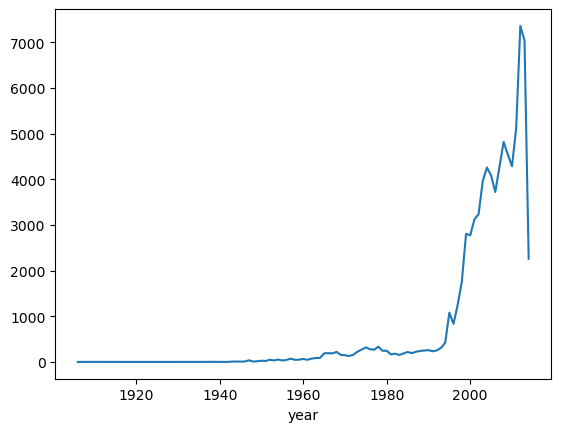

In [47]:
# 7 Write a Pandas program to create a plot to present the number of UFO reports per year. 

df1.groupby(['year']).size().plot()

In [55]:
# 8 Write a Pandas program to extract year, month, day, hour, minute, second and weekday from UFO reporting date

df2 = df1.assign(
                month = df1.datetime.dt.month_name(),
                day = df1.datetime.dt.day,
                hour = df1.datetime.dt.hour,
                minute = df1.datetime.dt.minute,
                second = df1.datetime.dt.second,
                weekday = df1.datetime.dt.day_name())
df2.loc[:, ['datetime', 'day', 'month', 'year', 'weekday', 'hour', 'minute', 'second', 'city']]

,datetime,day,month,year,weekday,hour,minute,second,city
0,1949-10-10 20:30:00,10,October,1949,Monday,20,30,0,san marcos
1,1949-10-10 21:00:00,10,October,1949,Monday,21,0,0,lackland afb
2,1955-10-10 17:00:00,10,October,1955,Monday,17,0,0,chester (uk/england)
3,1956-10-10 21:00:00,10,October,1956,Wednesday,21,0,0,edna
4,1960-10-10 20:00:00,10,October,1960,Monday,20,0,0,kaneohe
...,...,...,...,...,...,...,...,...,...
80327,2013-09-09 21:15:00,9,September,2013,Monday,21,15,0,nashville
80328,2013-09-09 22:00:00,9,September,2013,Monday,22,0,0,boise
80329,2013-09-09 22:00:00,9,September,2013,Monday,22,0,0,napa
80330,2013-09-09 22:20:00,9,September,2013,Monday,22,20,0,vienna


In [57]:
df2.weekday.value_counts().sort_values(ascending=False)

Saturday     14062
Sunday       11791
Friday       11620
Thursday     11024
Wednesday    10964
Tuesday      10777
Monday       10094
Name: weekday, dtype: int64

In [59]:
df2.weekday.value_counts(normalize=True).sort_values(ascending=False)

Saturday     0.175049
Sunday       0.146778
Friday       0.144650
Thursday     0.137230
Wednesday    0.136484
Tuesday      0.134156
Monday       0.125654
Name: weekday, dtype: float64

In [61]:
df2.country.value_counts().sort_values(ascending=False)

us    65114
ca     3000
gb     1905
au      538
de      105
Name: country, dtype: int64

In [62]:
df2.country.value_counts(normalize=True).sort_values(ascending=False)

us    0.921485
ca    0.042456
gb    0.026959
au    0.007614
de    0.001486
Name: country, dtype: float64

In [78]:
# 10 Write a Pandas program to count year-country wise frequency of reporting dates of UFO

df2['date'] = df2.datetime.dt.date
df2.pivot_table(index=['year'], columns=['country'], values=['date'], aggfunc='count')#.unstack()

date                           
country    au     ca   de     gb      us
year                                    
1910      NaN    NaN  NaN    NaN     2.0
1920      NaN    NaN  NaN    NaN     1.0
1925      NaN    NaN  NaN    NaN     1.0
1929      NaN    NaN  NaN    NaN     1.0
1931      NaN    NaN  NaN    NaN     2.0
...       ...    ...  ...    ...     ...
2010     16.0  137.0  4.0  115.0  3548.0
2011     13.0  127.0  3.0   51.0  4379.0
2012     19.0  242.0  6.0   82.0  6319.0
2013     32.0  248.0  6.0   48.0  6057.0
2014     14.0   45.0  3.0   21.0  1964.0

[83 rows x 5 columns]

In [84]:
#11 Write a Pandas program to extract unique reporting dates of UFO

df2.date.unique()

array([datetime.date(1949, 10, 10), datetime.date(1955, 10, 10),
       datetime.date(1956, 10, 10), ..., datetime.date(2011, 9, 9),
       datetime.date(2012, 9, 9), datetime.date(2013, 9, 9)], dtype=object)

In [97]:
#12 Write a Pandas program to get the difference (in days) between documented date and reporting date of UFO

df2.loc[:, ['date', 'date_documented']]
df2.apply(lambda x: pd.to_datetime(x.date_documented) - pd.to_datetime(x.date), axis=1)

0       19923 days
1       20521 days
2       19096 days
3       17265 days
4       15809 days
           ...    
80327      21 days
80328      21 days
80329      21 days
80330      21 days
80331      21 days
Length: 80332, dtype: timedelta64[ns]

In [99]:
#13 Write a Pandas program to add 100 days with reporting date of UFO

df2.apply(lambda x: pd.to_datetime(x.date_documented) + timedelta(days=100), axis=1)

0       2004-08-05
1       2006-03-26
2       2008-04-30
3       2004-04-26
4       2004-05-01
           ...    
80327   2014-01-08
80328   2014-01-08
80329   2014-01-08
80330   2014-01-08
80331   2014-01-08
Length: 80332, dtype: datetime64[ns]

In [100]:
df2.date_documented + timedelta(days=100)

0       2004-08-05
1       2006-03-26
2       2008-04-30
3       2004-04-26
4       2004-05-01
           ...    
80327   2014-01-08
80328   2014-01-08
80329   2014-01-08
80330   2014-01-08
80331   2014-01-08
Name: date_documented, Length: 80332, dtype: datetime64[ns]

In [102]:
# 14 Write a Pandas program to generate sequences of fixed-frequency dates and time spans

pd.date_range('2000-01-01', '2001-10-16', freq='W')

DatetimeIndex(['2000-01-02', '2000-01-09', '2000-01-16', '2000-01-23',
               '2000-01-30', '2000-02-06', '2000-02-13', '2000-02-20',
               '2000-02-27', '2000-03-05', '2000-03-12', '2000-03-19',
               '2000-03-26', '2000-04-02', '2000-04-09', '2000-04-16',
               '2000-04-23', '2000-04-30', '2000-05-07', '2000-05-14',
               '2000-05-21', '2000-05-28', '2000-06-04', '2000-06-11',
               '2000-06-18', '2000-06-25', '2000-07-02', '2000-07-09',
               '2000-07-16', '2000-07-23', '2000-07-30', '2000-08-06',
               '2000-08-13', '2000-08-20', '2000-08-27', '2000-09-03',
               '2000-09-10', '2000-09-17', '2000-09-24', '2000-10-01',
               '2000-10-08', '2000-10-15', '2000-10-22', '2000-10-29',
               '2000-11-05', '2000-11-12', '2000-11-19', '2000-11-26',
               '2000-12-03', '2000-12-10', '2000-12-17', '2000-12-24',
               '2000-12-31', '2001-01-07', '2001-01-14', '2001-01-21',
      

In [117]:
# 15 Write a Pandas program to create a conversion between strings and datetime.

stamp = dt(2020, 10, 16).strftime('%Y-%m-%d')
print(stamp)
print(pd.to_datetime(stamp))

2020-10-16
2020-10-16 00:00:00


In [126]:
# 16 Write a Pandas program to manipulate and convert date times with timezone information

stamp = pd.date_range('2020-10-16', periods=3, freq='H').tz_localize('UTC')
print(stamp)
print(stamp.tz_convert('Europe/Moscow'))

DatetimeIndex(['2020-10-16 00:00:00+00:00', '2020-10-16 01:00:00+00:00',
               '2020-10-16 02:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='H')
DatetimeIndex(['2020-10-16 03:00:00+03:00', '2020-10-16 04:00:00+03:00',
               '2020-10-16 05:00:00+03:00'],
              dtype='datetime64[ns, Europe/Moscow]', freq='H')


In [134]:
# 17 Write a Pandas program to get the average mean of the UFO sighting was reported.

df['instance'] = 1
ufo = pd.DataFrame(df.instance.resample('M').count())
ufo['date'] = pd.to_datetime(ufo.index.values)
ufo['month'] = ufo.date.apply(lambda x: x.month)
ufo.groupby(['month']).mean()

,instance
month,
1,52.675926
2,43.212963
3,50.453704
4,51.175926
5,49.000000
6,75.981308
7,89.177570
8,80.728972
9,70.915888


In [136]:
# 19 Write a Pandas program to create a graphical analysis of UFO sightings year.

import matplotlib.pyplot as plt
import seaborn as sns

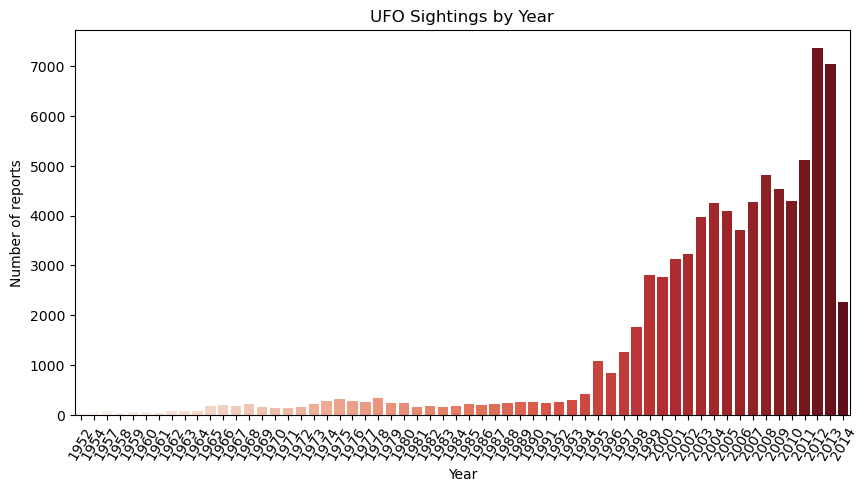

In [142]:
plot_data = df1.year.value_counts()
plot_index = plot_data.index
plot_values = plot_data.values

plt.figure(figsize=(10, 5))
plt.xticks(rotation = 60)
plt.title('UFO Sightings by Year')
plt.xlabel('Year')
plt.ylabel('Number of reports')
years_plot = sns.barplot(x=plot_index[:60],y=plot_values[:60], palette = "Reds")

In [147]:
# 19 Write a Pandas program to check the empty values of UFO Dataframe

df.isnull().sum()

date_time                             0
city                                  0
state/province                     5797
country                            9670
ufo_shape                          1932
length_of_encounter_seconds           0
described_duration_of_encounter       0
description                          15
date_documented                       0
latitude                              0
longitude                             0
instance                              0
dtype: int64

/Users/April/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


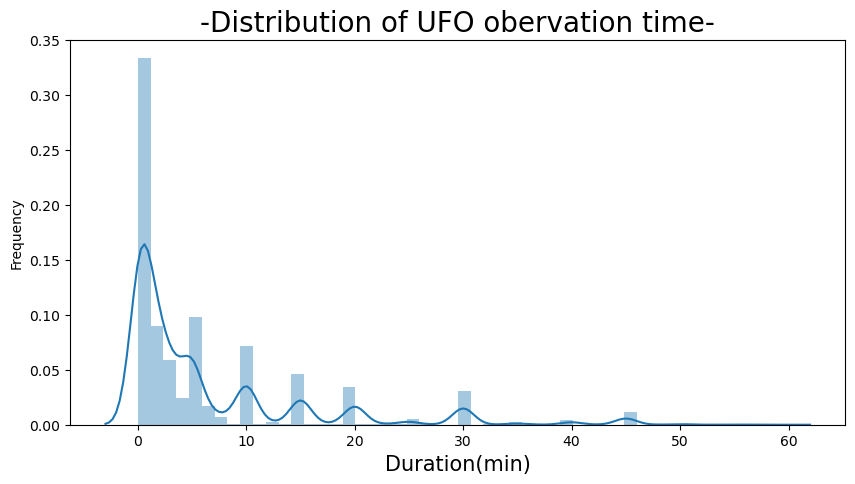

In [154]:
# 20 Write a Pandas program to create a plot of distribution of UFO observation time

df['duration'] = df.length_of_encounter_seconds.astype(float)/60
s = df.duration.quantile(0.95)
temp = df.duration.sort_values()
temp = temp[temp < s]

plt.figure(figsize=(10, 5))
sns.distplot(temp)
plt.xlabel('Duration(min)', fontsize=15)
plt.ylabel("Frequency", fontsize=10)
plt.xticks(fontsize=10)
plt.title("-Distribution of UFO obervation time-", fontsize=20)
plt.show()

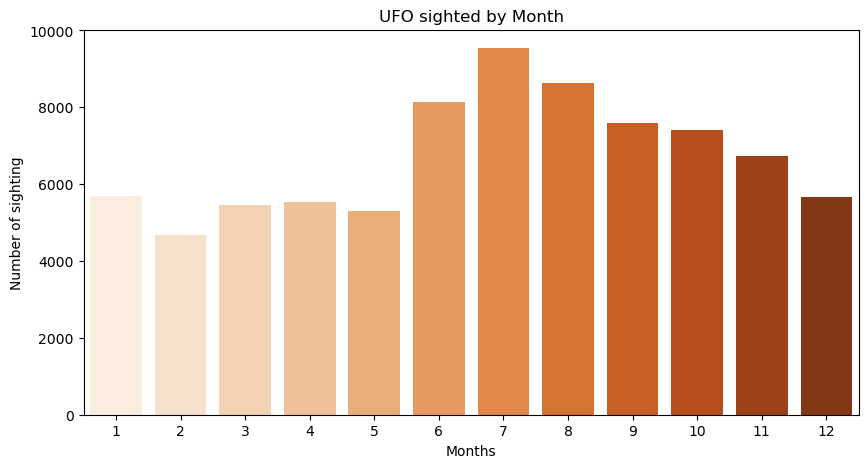

In [161]:
# 21 Write a Pandas program to create a graphical analysis of UFO sighted by month

df1['month'] = df1.datetime.dt.month
month_data = df1.month.value_counts()
month_index = month_data.index
month_values = month_data.values

plt.figure(figsize=(10, 5))
#plt.xticks(rotation = 60)
plt.title('UFO sighted by Month')
plt.xlabel('Months')
plt.ylabel('Number of sighting')
months_plot = sns.barplot(x=month_index[:60],y=month_values[:60], palette = "Oranges")

In [162]:
# 25 Write a Pandas program to create a Timewheel of Hour Vs Year comparison of the top 10 years 
# in which the UFO was sighted

import matplotlib as mpl
import matplotlib.cm as cm

df_top_10 = df1.year.value_counts().head(10)
df_top_10

2012    7356
2013    7038
2011    5107
2008    4819
2009    4542
2010    4283
2007    4269
2004    4257
2005    4083
2003    3962
Name: year, dtype: int64

In [168]:
def is_top_years(year):
    if year in df_top_10.index:
        return year

In [173]:
month_vs_year = df1.pivot_table(columns=df1.month, 
                                index=df1.year.apply(is_top_years), 
                                aggfunc='count', 
                                values='city')
month_vs_year

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2003.0,287,230,169,204,220,271,410,499,466,425,437,344
2004.0,266,265,372,355,353,374,403,498,379,417,294,281
2005.0,228,255,327,294,271,368,420,322,480,443,421,254
2007.0,398,243,331,290,277,382,435,430,416,398,341,328
2008.0,436,345,304,404,313,443,530,468,356,485,419,316
2009.0,455,367,313,294,339,357,543,464,569,286,293,262
2010.0,258,171,236,269,306,341,792,481,414,422,315,278
2011.0,297,256,309,294,283,374,715,599,503,590,403,484
2012.0,528,357,489,461,473,695,880,827,695,620,719,612


In [175]:
month_vs_year.index = month_vs_year.index.astype(int)
month_vs_year.columns = month_vs_year.columns.astype(int)

print("\nComparison of the top 10 years in which the UFO was sighted vs each month:")
def pie_heatmap(table, cmap='coolwarm_r', vmin=None, vmax=None,inner_r=0.25, pie_args={}):
    n, m = table.shape
    vmin = table.min().min() if vmin is None else vmin
    vmax = table.max().max() if vmax is None else vmax
    
    centre_circle = plt.Circle((0,0),inner_r,edgecolor='black',facecolor='white',fill=True,linewidth=0.25)
    plt.gcf().gca().add_artist(centre_circle)
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    cmapper = cm.ScalarMappable(norm=norm, cmap=cmap)
    
    for i, (row_name, row) in enumerate(table.iterrows()):
        labels = None if i > 0 else table.columns
        wedges = plt.pie([1] * m,radius=inner_r+float(n-i)/n, colors=[cmapper.to_rgba(x) for x in row.values],
           labels=labels, startangle=90, counterclock=False, wedgeprops={'linewidth':-1}, **pie_args)
        plt.setp(wedges[0], edgecolor='grey',linewidth=1.5)
        wedges = plt.pie([1], radius=inner_r+float(n-i-1)/n, colors=['w'], labels=[row_name], startangle=-90, wedgeprops={'linewidth':0})
        plt.setp(wedges[0], edgecolor='grey',linewidth=1.5)


Comparison of the top 10 years in which the UFO was sighted vs each month:


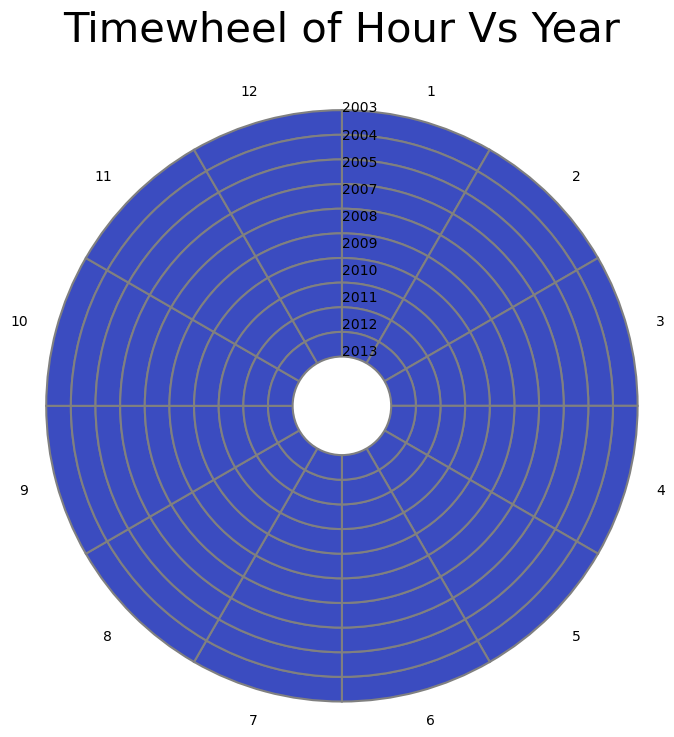

In [176]:
plt.figure(figsize=(8,8))
plt.title("Timewheel of Hour Vs Year",y=1.08,fontsize=30)
pie_heatmap(month_vs_year, vmin=-20,vmax=80,inner_r=0.2)